In [10]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Thur Sep  14 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [11]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

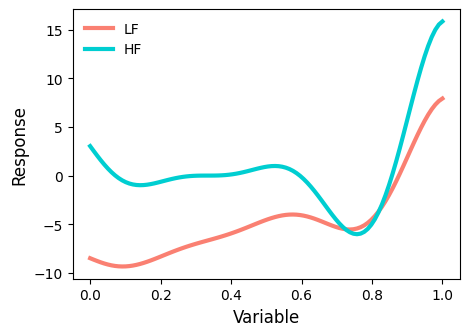

In [12]:
''' The multi-fidelity Forrester function is commonly used as a toy problem in studies of surrogate modeling and multi-fidelity analysis. 
It consists of a high-fidelity and a low-fidelity function, generally denoted as fHF(x) and fLF(x), respectively.

The Forrester function f(x) is often defined as:
f(x)=(6x−2)2sin⁡(12x−4)

For the multi-fidelity setting, a low-fidelity approximation fLF(x) is usually created by adding some bias and noise to the high-fidelity 
function f(x). 

fLF​(x)=0.5f(x)+10(x−0.5)−5 '''

# Define the High-Fidelity function (HF)
def func_HF(x):
    return (6*x - 2)**2 * np.sin(12*x - 4)

# Define the Low-Fidelity function (LF)
def func_LF(x):
    return 0.5 * func_HF(x) + 10 * (x - 0.5) - 5

# Lower and upper bounds for function evaluations
lb = 0
ub = 1

# Generate an array of 100 points, linearly spaced between the lower and upper bounds
x = np.linspace(lb, ub, 100)

# Evaluate the High-Fidelity function (HF) at these points
fHF = func_HF(x)

# Evaluate the Low-Fidelity function (LF) at these points
fLF = func_LF(x)

# Initialize the figure for plotting
plt.figure(figsize=[5, 3.5])

# Plot the Low-Fidelity function (LF)
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plot the High-Fidelity function (HF)
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Configure plot parameters
#plt.xlim([0, 1])
#plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot as a high-resolution PNG file
plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


Text(0, 0.5, 'Response')

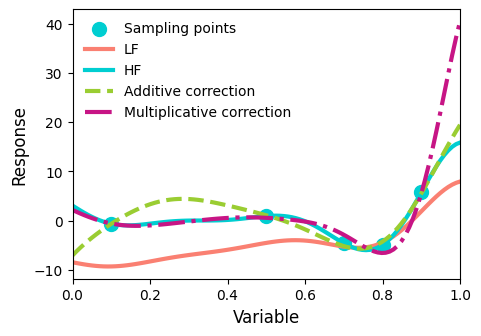

In [28]:
# Plotting starts here
# Define points sampled for HF function
x_sampHF = np.array([0.1, 0.5, 0.7, 0.8, 0.9])

# Define points sampled for LF function (cheap function)
x_sampLF = x

model_add = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF)-func_LF(x_sampHF), deg=3, rcond=None, full=False, w=None, cov=False))
model_mult = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF)/func_LF(x_sampHF), deg=3, rcond=None, full=False, w=None, cov=False))

def func_add(x):
    return model_add(x) + func_LF(x)

def func_mult(x):
    return model_mult(x) * func_LF(x)

np.random.seed(1)
x_add_mult = np.random.random(200)+1
y_add = func_add(x_add_mult) 
y_mult = func_mult(x_add_mult) 


plt.figure(figsize=[5,3.5])
plt.scatter(x_sampHF,func_HF(x_sampHF),100,c='darkturquoise',label='Sampling points')
plt.plot(x,fLF,c='salmon',linewidth=3,label='LF')
plt.plot(x,fHF,c='darkturquoise',linewidth=3,label='HF')
plt.plot(x,func_add(x),'--',c='yellowgreen',linewidth=3,label='Additive correction')
plt.plot(x,func_mult(x),'-.',c='mediumvioletred',linewidth=3,label='Multiplicative correction')
plt.xlim([0,1])
plt.legend(frameon=False, fontsize=10)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Response',fontsize=12)
#plt.ylim([18,30])
#plt.savefig('AddMult.png',dpi=1000, bbox_inches='tight', transparent=True)

[ 0.04976505 -4.63706379 11.3665923 ]


Text(0, 0.5, 'Response')

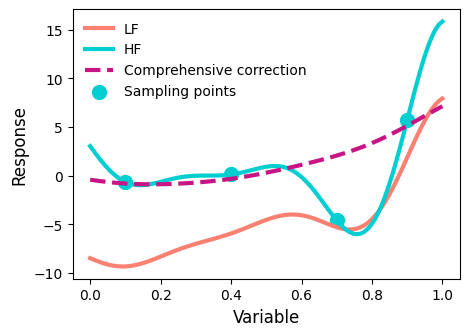

In [37]:
''' func_X(x): Expands the input x into a design matrix X comprising the LF model, x, and x2.
    func_coef(X, Y, W): Computes the model coefficients using weighted least squares.
    func_comprehensive(x, x_sampHF): Forms a comprehensive model that refines the LF model based on HF data at sampled points.
    Plotting: Visualizes LF, HF, and the comprehensive model, along with HF sampling points.
    '''

# Previously defined HF and LF functions would be here

# Define the composite function to expand feature space (X)
def func_X(x):
    return np.array([func_LF(x), x, x**2]).T

# Calculate coefficients for the comprehensive model based on least squares
# X: design matrix, Y: response vector, W: weight matrix
def func_coef(X, Y, W=1):
    if np.mean(W) ==1:
        W=np.diag(np.ones(len(X)))
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

# Define the comprehensive function to produce a correction over LF model
# x: input variable array, x_sampHF: HF sample points
def func_comprehensive(x, x_sampHF,W):
    X = func_X(x)  # Obtain composite features
    Y = func_HF(x_sampHF)  # Obtain HF function values at sample points
    B = func_coef(func_X(x_sampHF), Y,W)  # Coefficients for comprehensive model
    print(B)
    return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

# Plotting starts here
# Define points sampled for HF function
x_sampHF = np.array([0.1, 0.4, 0.7, 0.9])

# Define points sampled for LF function (cheap function)
x_sampLF = x

# Initialize the figure
plt.figure(figsize=[5, 3.5])

W= np.diag(func_HF(x_sampHF) -func_LF(x_sampHF))

# Plot LF and HF models
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Plot the comprehensive model
plt.plot(x_sampLF, func_comprehensive(x_sampLF, x_sampHF,W), '--', c='mediumvioletred', linewidth=3, label='Comprehensive correction')

# Plot the HF sample points
plt.scatter(x_sampHF, func_HF(x_sampHF), 100, c='darkturquoise', label='Sampling points')

# Configure plot parameters
#plt.xlim([0, 1])
#plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot
#plt.savefig('Comprehensive.png', dpi=1000, bbox_inches='tight', transparent=True)


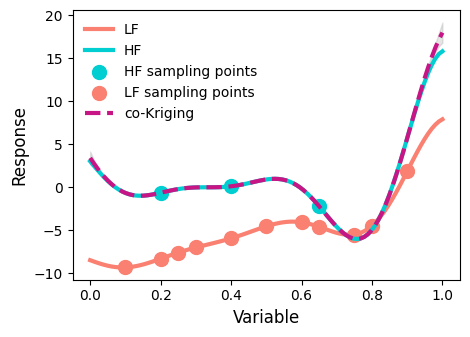

In [35]:
# Surrogate Model: Import the co-Kriging model from OpenMDAO for multi-fidelity analysis.
from openmdao.surrogate_models.multifi_cokriging import MultiFiCoKriging as coKG

# Experiment Design: Points where HF and LF models are evaluated
Xe = np.array([[0.2], [0.4], [0.65]])  # For HF model
Xc = np.vstack((np.array([[0.1], [0.25], [0.3], [0.5], [0.6], [0.75], [0.8], [0.9]]), Xe))  # For LF model
ye = func_HF(Xe)  # Response from HF model
yc = func_LF(Xc)  # Response from LF model

# Initialize the co-Kriging model (Not Defined in Code Snippet)
ndmodel = coKG()
ndmodel.fit([Xc, Xe], [yc, ye])  # Model Training
f_pred = ndmodel.predict(x.reshape(-1, 1))  # Prediction


# Initialize Figure: Set the figure size for visualization.
plt.figure(figsize=[5, 3.5])

# Plotting Low-Fidelity Model: The LF model is visualized with a continuous line in the 'salmon' color scheme.
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plotting High-Fidelity Model: The HF model is visualized with a continuous line in the 'darkturquoise' color scheme.
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# HF Sampling Points: Scatter plot of the HF evaluation points (Xe) and their corresponding responses (ye).
plt.scatter(Xe, ye, 100, c='darkturquoise', label='HF sampling points')

# LF Sampling Points: Scatter plot of the LF evaluation points (Xc) and their corresponding responses (yc).
plt.scatter(Xc, yc, 100, c='salmon', label='LF sampling points')

# Co-Kriging Prediction: The predicted response using the co-Kriging model is visualized using a dashed line in the 'mediumvioletred' color scheme.
plt.plot(x, f_pred[0], '--', c='mediumvioletred', linewidth=3, label='co-Kriging')

# Prediction Confidence Interval: Shading the area representing the confidence interval of the co-Kriging prediction.
plt.fill_between(x, (f_pred[0] - 2*f_pred[1]).reshape(len(x)), (f_pred[0] + 2*f_pred[1]).reshape(len(x)), color='gray', alpha=0.2)

# Legend: Add a legend to the plot without a frame to improve visual clarity.
plt.legend(frameon=False)

# Axes Labels: Add labels to the x and y-axes to clarify the plotted variables.
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Display Plot: Render the figure.
plt.show()

# Save Figure (Optional): The figure can be saved as a high-resolution PNG file. This line is commented out in the original code.
# plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)
